In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import convolve

In [10]:
rate, data = wavfile.read("10-second-count-down.wav")
data = data.astype(np.float32)


if data.ndim > 1:
    data = data[:, 0]

In [11]:
print(len(data))

520704


In [12]:
# (a) Scaling (volume change)
scaled = 0.2 * data   # reduce volume

In [13]:
wavfile.write("scaled.wav", rate, scaled.astype(np.int16))

In [14]:
reflected = -data

wavfile.write("reflected.wav", rate, reflected.astype(np.int16))

In [15]:
reversed_audio = data[::-1]

wavfile.write("reversed.wav", rate, reversed_audio.astype(np.int16))

In [16]:
kernel = np.ones(10) / 10   # 10-sample moving average
filtered = convolve(data, kernel, mode="same")

In [17]:
wavfile.write("filtered.wav", rate, filtered.astype(np.int16))

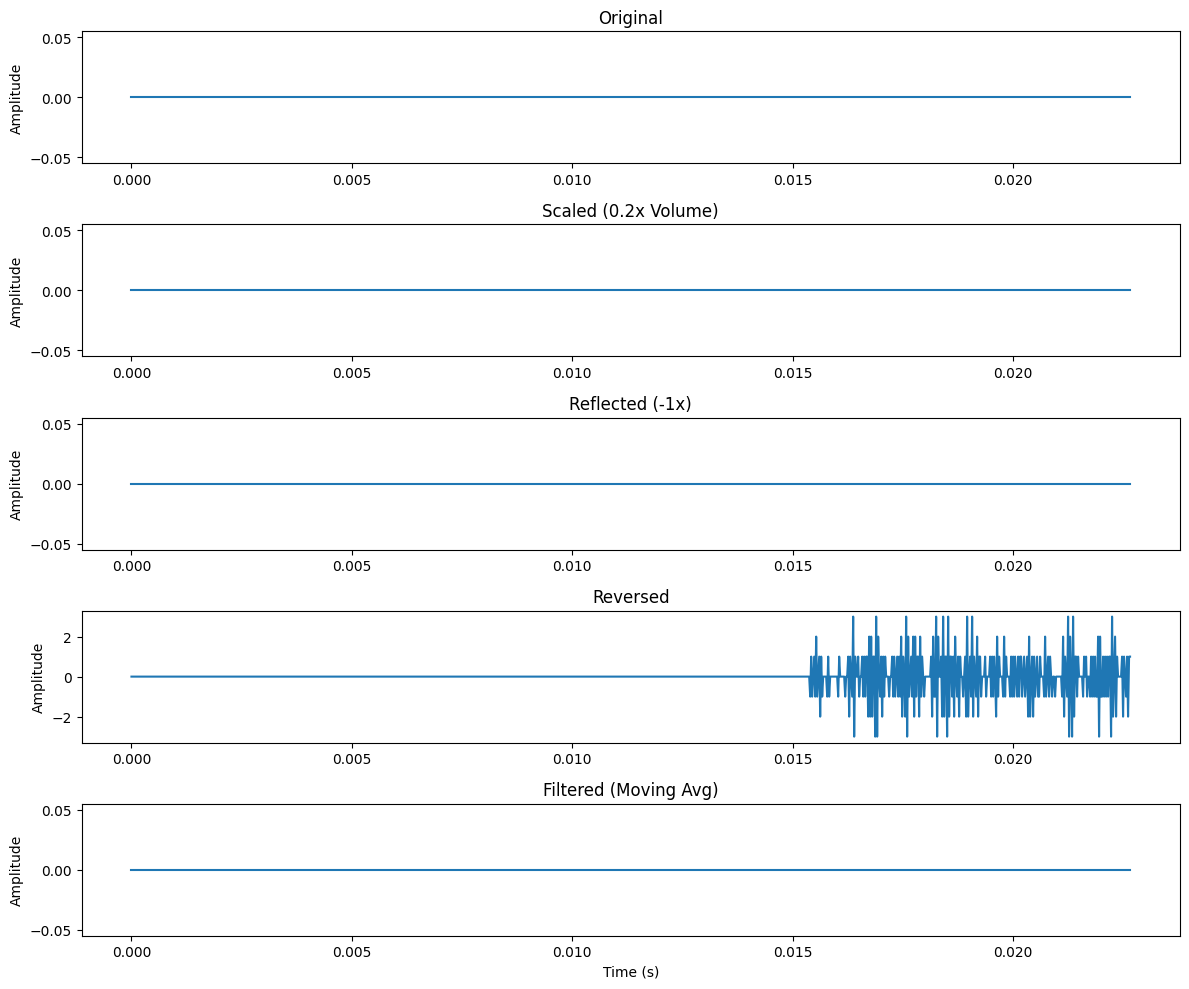

In [18]:
# New cell: Plot all waveforms (add after filtering cell)
t = np.arange(len(data)) / rate  # Time axis (sec)

fig, axs = plt.subplots(5, 1, figsize=(12, 10))
axs[0].plot(t[:1000], data[:1000])  # Zoom first 1 sec for clarity
axs[0].set_title('Original')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t[:1000], scaled[:1000])
axs[1].set_title('Scaled (0.2x Volume)')
axs[1].set_ylabel('Amplitude')

axs[2].plot(t[:1000], reflected[:1000])
axs[2].set_title('Reflected (-1x)')
axs[2].set_ylabel('Amplitude')

axs[3].plot(t[:1000], reversed_audio[:1000])
axs[3].set_title('Reversed')
axs[3].set_ylabel('Amplitude')

axs[4].plot(t[:1000], filtered[:1000])
axs[4].set_title('Filtered (Moving Avg)')
axs[4].set_ylabel('Amplitude')
axs[4].set_xlabel('Time (s)')

plt.tight_layout()
plt.savefig('waveforms_comparison.png', dpi=300)  # Export for slides/report
plt.show()